In [1]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False # have to install tex first?
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Empirical Cumulative Distribution Function
### Contents: 
    1. Empirical Cumulative Distribution Function

## Empirical Cumulative Distribution Function (ECDF)

Consider a random variable $X$. The probability that $X$ equals a certain value $x$ is then given by its *probability mass function* $p_X(X=x)$ (discrete case) or *probability density function* $f_X(X=x)$ (continuous case). Then, the cumulative distribution function is given as
\begin{equation}
P \left( X \leq x \right) = \sum_{i=0}^x p_X(X=i) \hspace{10pt} \text{or} \hspace{10pt} P(X \leq x)=  \int_{-\infty}^x f_X (x') dx'
\end{equation}
in the discrete and continuous case respectively.

In practice, the best we can do is estimate these distributions from the data. The pmf/pdf is typically estimated by a histogram or a kernel density estimate. The cdf could in principle by estimated by taking the cumulative sum of the histogram, as shown below. The result is called the empirical cumulative distribution function (ecdf).

In [4]:
# generate data
mu = 0
sigma = 1
x_rand = np.random.normal(mu, sigma, 10000)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


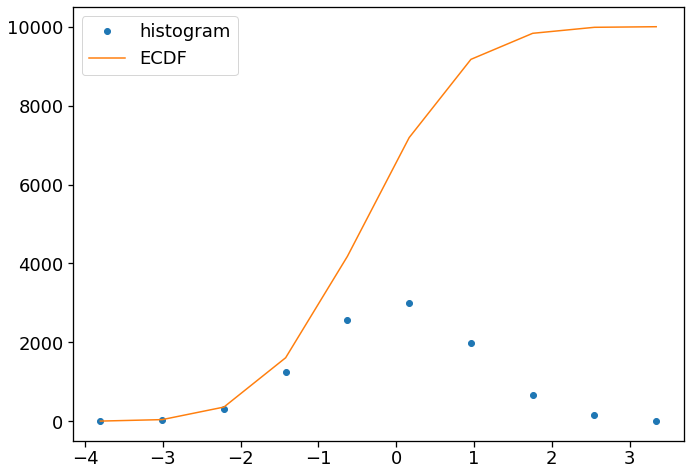

In [5]:
# method 1: the ugly way by summing the histogram
a, b = np.histogram(x_rand)
b_new = ((np.roll(b,1) + b ) / 2 )[1::]

plt.plot(b_new, a, 'o', label='histogram')
plt.plot(b_new, np.cumsum(a), label='ECDF')
plt.legend()
plt.show()

However, estimating the histogram is a somewhat ambiguous practice as one has to decide how to bin the data. It is better practice to estimate the cdf according to its definition:
\begin{equation}
F_X( x ) =  \frac{\text{number of elements in the sample} \leq x}{n}  =\frac{1}{n} \sum_i^n I(x_i \leq x ),
\end{equation}
where the indicator function $I(x)$ equals the count of the amount of observations smaller than $x$.

There are essentially two ways to implement the definition above in code. The first is to sort the observed values and increase the count for every observation by one. Then, the ECDF is obtained by plotting the sorted observed values $x$ versus the count $y$. The result will be that the ticks on the y-axis are regularly spaced, whereas the ticks on the x-axis are generally not regularly spaced. Although perfectly fine, this is sometimes undesirable; e.g. when one wants to compute the vertical difference between points on two ECDFs. In this case, one wants equally spaced x-ticks. In that case, one needs to define a x-grid and then, for every point in the x-grid, count how many observations in the sample are smaller than or equal to that value. 

Both of these methods are implemented below.

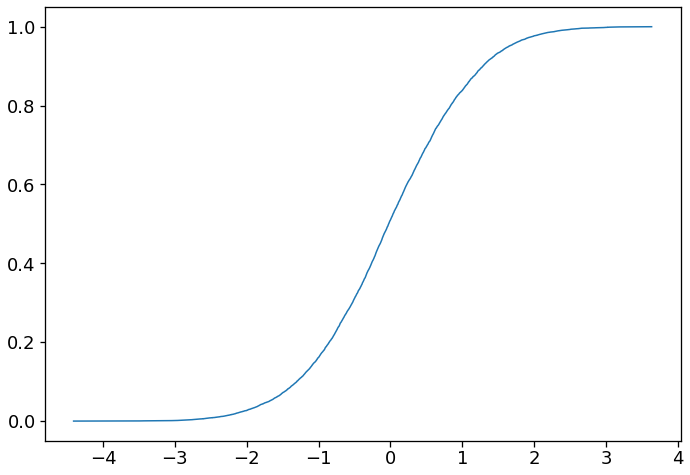

In [33]:
# method 2: regular y-grid
def ECDF(rand_sample):
    x = np.sort(np.unique(rand_sample))                 # create x-grid
    y = np.arange(1, x.size+1) / x.size                 # increase count by one everytime we hit a observation in the x-grid
    return x,y

x, y = ECDF(x_rand)
plt.plot(x, y)
plt.show()

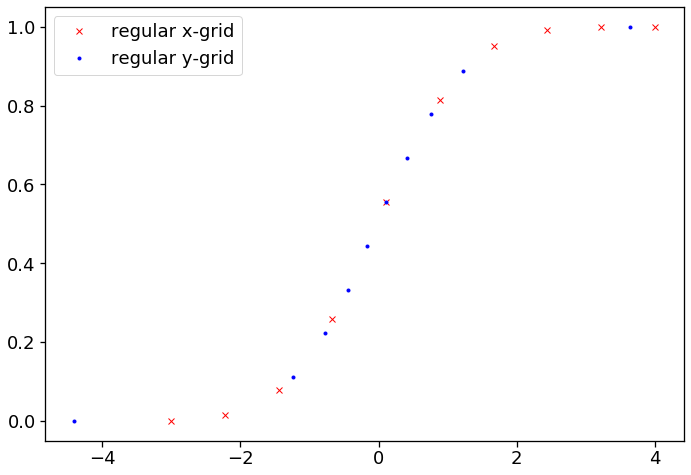

In [36]:
# method 3: regular x-grid
# make sure to allow to set x_min, x_max yourself, so you can later compare different ECDFs because they have the 
# same grid
def ECDF_regx(rand_sample, x_min, x_max, n_steps = 1000 ):
    
    x = np.sort(np.unique(rand_sample))
    x_grid = np.linspace(x_min, x_max, n_steps)
    n = x.size
    
    y = []
    for i in x_grid:
        tmp = x[x <= i]
        frac = tmp.size / n
        y.append(frac)
        
    y = np.array(y)    
    return x_grid, y

xreg,yreg = ECDF_regx(x_rand, -3, 4 )

idx1 = np.linspace(0, len(xreg)-1, 10).astype(int)
idx2 = np.linspace(0, len(x)-1, 10).astype(int)
plt.plot(xreg[idx1], yreg[idx1], 'rx', label='regular x-grid')
plt.plot(x[idx2], y[idx2], 'b.', label='regular y-grid')
plt.legend()
plt.show()

In [ ]:
# lib implementation
from statsmodels.distributions.empirical_distribution import ECDF



# something on the Percent Point Function ?? inverse of cdf
